> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigation of The Movies database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

## Brief intro of the dataset
The dataset used for this analysis is **TMDb movie data** which contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
The details associated to each released movie is provided such as:
- The popularity of the movies (popularity)
- Budget
- Revenue
- Title
- Casts
- Director
- Overview
- Genres etc.,


## Analysis on the following questions:
- Who is the most popular shooting star within the year range?
- Top 10 genres that has most popularity
- Which director produce the most popular movie?
- Which genres are most popular from year to year?
- Does top popular genres correlate with the top popular tags
- Does movies with high budget over the year/month
- Which key words attract more popularity
- Top 10 production companies with highest movie popularity
- Movies production inflation over time.
- Does particular genres attract more vote count
- Which year has the most movie released?
- Total runtime of movies with highest popularity
- Viewers engagement over the popular genres (vote_count)
- What kinds of properties are associated with movies that have high revenues?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Viewing the top 5 dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Shape of TMDB dataset
df.shape

(10866, 21)

In [5]:
# More information about different features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Number of N/A in each feature of the dataset
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Number of N/A in each feature of the dataset

In [7]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# Number of columns with N/A
df.isna().any().value_counts()

False    12
True      9
dtype: int64

It is noticeable that 9 features from TMDB dataset has more than 1 blank rows

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning of TMDB dataset

- Since `id` and `imdb_id` serve as unique identifier of different movies, it is safe to drop the columns as we will be analyzing the movies.

- `homepage` and `overview` columns refer to where the movies can be found and the main summary of the movie and this can be disregarded for the analysis.

It is safe to remove the following rows with N/A in the dataframe:
- Cast (76) i.e., This indicates that nobody acted in the movie.
- Director (44) i.e., This indicates that nobody coordinate the movie.
- Genres (23) i.e., It doesn't belongs to any movie genre.
- Production company i.e., This indicates that no company produces the movies.

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


Dropping unnecessary columns for the analysis

In [10]:
df.drop(columns=['id', 'imdb_id', 'homepage', 'overview'], inplace=True)

Changing `release_date` to datetime object and also setting it as index

In [11]:
df['release_date'] = pd.to_datetime(df['release_date'])

df.set_index('release_date', inplace=True)

df.sort_index(inplace=True) # Sorting the dataframe ascending base on the release_date

It is safe to disregard movies without a production company

In [12]:
df.dropna(subset=['cast', 'director', 'genres', 'production_companies'], inplace=True)

Changing the following columns into a Python list
- cast
- genres
- production_companies

The string provided in the dataframe is separated with `|`. By change these features to list, each values will be easily accessible.

In [13]:
def change_to_list(dataframe, columns: list, sep: str ='|')->None:
    """
        change_to_list(dataframe, columns)

        The columns provided will be split base on sep which is default to |.
        And also the dataframe will be changed inplace. 
    """
    for column in columns:
        try:
            dataframe[column] = dataframe[column].str.split(sep)
        except KeyError:
            print(f'{column} not found in the dataset')

In [14]:
change_to_list(df, ['cast', 'genres', 'director', 'keywords', 'production_companies'])

Top 5 rows of the dataframe after modification

In [15]:
df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
release_date,,,,,,,,,,,,,,,,
1972-01-01,0.384193,90000,0,The Last House on the Left,"[Sandra Peabody, Lucy Grantham, David Hess, Fr...",[Wes Craven],It rests on 13 acres of earth over the very ce...,"[rape, gun, birthday, concert, death of a child]",84,"[Horror, Thriller]","[Lobster Enterprises, Sean S. Cunningham Films...",46,6.1,1972,4.693105e+05,0.000000e+00
1972-01-01,0.338541,0,0,Chato's Land,"[Charles Bronson, Jack Palance, James Whitmore...",[Michael Winner],"What Chato's land doesn't kill, Chato will.","[rape, posse, dead horse, canteen, carcass]",110,"[Action, Adventure, Western]",[Scimitar Films],15,6.6,1972,0.000000e+00,0.000000e+00
1972-01-13,0.265891,0,7500000,The Cowboys,"[John Wayne, Roscoe Lee Browne, Bruce Dern, Co...",[Mark Rydell],All they wanted was their chance to be men...a...,"[boy, beef, cattle drive, rancher, cattle]",131,"[Action, Adventure, Drama, Western]",[Warner Bros.],30,6.6,1972,0.000000e+00,3.910921e+07
1972-02-13,0.669045,6000000,0,Cabaret,"[Liza Minnelli, Michael York, Helmut Griem, Jo...",[Bob Fosse],Life is a Cabaret,"[berlin, sex, entertainer, cabaret, gramophone]",124,"[Drama, Music, Romance]","[ABC Pictures, Bavaria Film, Allied Artists Pi...",76,6.9,1972,3.128737e+07,0.000000e+00
1972-03-09,0.450264,1000000,0,Silent Running,"[Bruce Dern, Cliff Potts, Ron Rifkin, Jesse Vi...",[Douglas Trumbull],Amazing companions on an incredible journey......,"[space marine, sunlight, plants, space travel,...",89,"[Adventure, Drama, Science Fiction]","[Universal Pictures, Trumbull/Gruskoff Product...",69,6.1,1972,5.214561e+06,0.000000e+00


Information after cleaning the dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9773 entries, 1972-01-01 to 2071-12-29
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9773 non-null   float64
 1   budget                9773 non-null   int64  
 2   revenue               9773 non-null   int64  
 3   original_title        9773 non-null   object 
 4   cast                  9773 non-null   object 
 5   director              9773 non-null   object 
 6   tagline               7636 non-null   object 
 7   keywords              8667 non-null   object 
 8   runtime               9773 non-null   int64  
 9   genres                9773 non-null   object 
 10  production_companies  9773 non-null   object 
 11  vote_count            9773 non-null   int64  
 12  vote_average          9773 non-null   float64
 13  release_year          9773 non-null   int64  
 14  budget_adj            9773 non-null   float64
 15  rev

Dataset shape after cleaning

In [17]:
df.shape

(9773, 16)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1
- Who is the most popular shooting star within the year range?

In [18]:
from collections import Counter


def value_occurences(data: pd.DataFrame, column: str, most_common:int =5)->pd.DataFrame:
    """
        The function will return a dataframe which contains the most common yearly column count in the dataset.
        
    """
    
    f_data = pd.DataFrame(columns=['Year', column.title(), 'Count'])
    years = data['release_year'].unique()

    for year in years:
        yearlyfeaturecount = Counter() # This will keep count of the yearly data count
        rows = data.query(f'release_year == {year}')[column] # Particular year data
        for row in rows:
            yearlyfeaturecount.update(row) # Updating the count of each value

        # Temporary variable to hold the current year value count
        temp_df = pd.DataFrame(columns=[column.title(), 'Count'], 
                            data=yearlyfeaturecount.most_common(most_common))
        temp_df['Year'] = np.repeat(year, most_common)

        # Concatenate temp_df with the f_data (Final dataframe)
        f_data = pd.concat([f_data, temp_df], ignore_index=True)
    return f_data

The top 2 most used actors yearly

In [19]:
most_popular_shooting_star = value_occurences(df, 'cast', most_common=2)

In [20]:
# Top 10 data from the most_popular_shoting_star dataframe
most_popular_shooting_star.head(10)

,Year,Cast,Count
0,1972,Peter Cushing,4
1,1972,Charles Bronson,2
2,1973,Mitchell Ryan,3
3,1973,Marianna Hill,2
4,1974,Charlotte Rampling,2
5,1974,Gene Wilder,2
6,1975,Jack Nicholson,2
7,1975,Karen Black,2
8,1976,Jodie Foster,4
9,1976,Richard Harris,2


In [21]:
# Top 2 most used actors from the year 2000 above
most_popular_shooting_star.query('Year >= 2000').tail(10)

,Year,Cast,Count
78,2011,Nicolas Cage,5
79,2011,Bill Nighy,5
80,2012,Elizabeth Banks,6
81,2012,Bruce Willis,6
82,2013,James Franco,10
83,2013,Danny Trejo,6
84,2014,Liam Neeson,7
85,2014,Jessica Chastain,7
86,2015,Ben Kingsley,6
87,2015,James Franco,6


Report:

### Research Question 2  
- Top 10 genres that has the most movies tag
- 10 Genres with lowest movies tag

In [22]:
def counter(data, column):
    """
        This function will return a dataframe containing the value counts of the specified column which contains list in the data.

    """
    featurecount = Counter() # This will keep count of data count
    for row in data[column]:
        featurecount.update(row)
    f_data = pd.DataFrame(columns=[column.title(), 'Count'], data=featurecount.most_common())
    
    return f_data

In [23]:
genres_count = counter(df, 'genres').sort_values('Count', ascending=False)

In [24]:
# Top 10 Genres with most popularity
top10_genres = genres_count.head(10)

In [25]:
def genre_count_visual(x, y, title):
    """
        Bar plot of genre's count
        
    """
    plt.figure(figsize=(12, 9)) # Figure size
    plt.bar(x, y) # The plot
    plt.title(title) # The plot title
    plt.xlabel('Genres')
    plt.ylabel('Count');

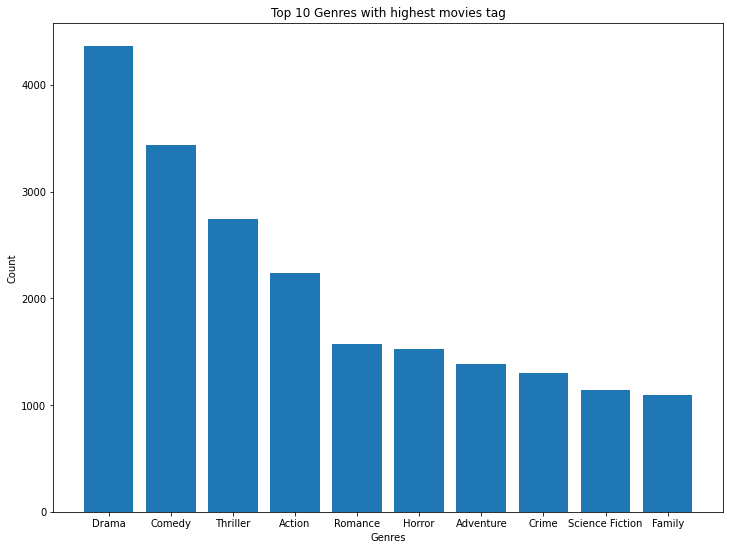

In [26]:
genre_count_visual(top10_genres['Genres'], 
                    top10_genres['Count'], 
                    'Top 10 Genres with highest movies tag')

In [27]:
# 10 Genres with lowest movies tag
last10_Genres = genres_count.tail(10) 

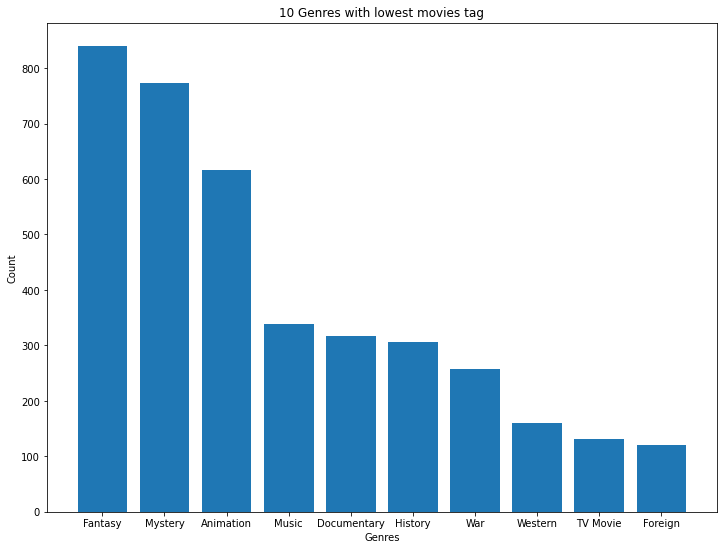

In [28]:
genre_count_visual(last10_Genres['Genres'], 
                    last10_Genres['Count'], 
                    '10 Genres with lowest movies tag')

Report:

### Research Question 3
- Which director produces the top 10 most popular movie?

In [115]:
def spilldown(column: str, include: str ='popularity'):
    """
        This function will spill the specified column which contains list in the dataframe downnward.

        If include is set to None, the function will return a dataframe with spilled column without popularity.

        include attribute can be modified to use other feature in the spilled dataframe
    """
    if include:
        filldown = df[[column, include]].explode(column)
        return filldown.groupby(column)[include]\
                        .mean()\
                        .sort_values(ascending=False)
    else:
        return df[[column]].explode(column)

In [102]:
director_pop = spilldown('director')

director_pop.head(10)

director
Colin Trevorrow       16.696886
David Leitch          11.422751
Chad Stahelski        11.422751
Alan Taylor            6.883129
Christopher Nolan      6.865185
Alex Garland           6.118847
Patrick Tatopoulos     5.806897
Wes Ball               5.553082
Dan Gilroy             5.522641
David Yates            5.126634
Name: popularity, dtype: float64

Top 10 directors who produce the most popular movies are:

In [103]:
# Top 10 directors with highest movies popularity
top10_directors = pd.DataFrame(director_pop.head(10))
top10_directors

,popularity
director,
Colin Trevorrow,16.696886
David Leitch,11.422751
Chad Stahelski,11.422751
Alan Taylor,6.883129
Christopher Nolan,6.865185
Alex Garland,6.118847
Patrick Tatopoulos,5.806897
Wes Ball,5.553082
Dan Gilroy,5.522641


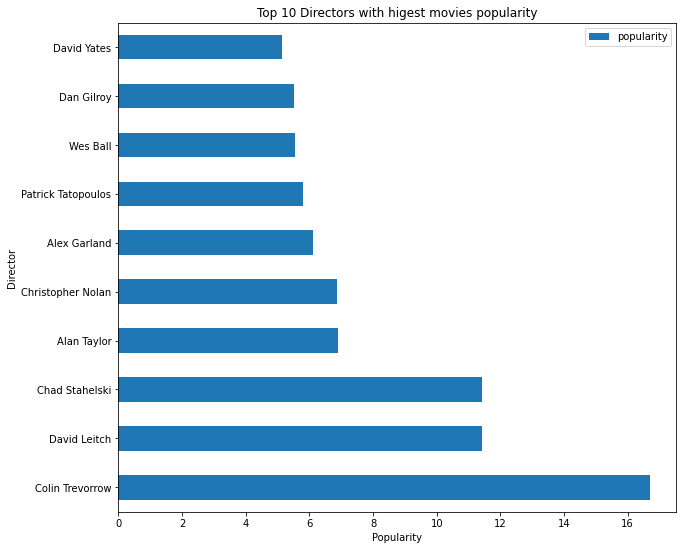

In [104]:
fig, ax = plt.subplots(figsize=(10, 9))
top10_directors.plot.barh(ax=ax);
plt.ylabel('Director')
plt.xlabel('Popularity')
plt.title('Top 10 Directors with higest movies popularity');

Report:

###  Research Question 4
- Which genres are most popular from year to year?

In [80]:
yearly_popular_genre = value_occurences(df, 'genres', most_common=1)

In [81]:
yearly_popular_genre.head(10)

,Year,Genres,Count
0,1972,Drama,16
1,1973,Drama,31
2,1974,Drama,21
3,1975,Drama,17
4,1976,Drama,22
5,1977,Drama,23
6,1978,Drama,28
7,1979,Drama,30
8,1980,Drama,32
9,1981,Drama,32


In [ ]:
yearly_popular_genre['Genres'].unique()

array(['Drama', 'Comedy'], dtype=object)

In [87]:
yearly_popular_genre.shape

(56, 3)

In [86]:
yearly_popular_genre.query('Genres == "Comedy"')

,Year,Genres,Count
12,1984,Comedy,37
13,1985,Comedy,50
15,1987,Comedy,53
16,1988,Comedy,65
17,1989,Comedy,59
22,1994,Comedy,83
29,2001,Comedy,89
31,2003,Comedy,102
50,1966,Comedy,15
51,1967,Comedy,16


### Research Question 5
- Which key words attract more popularity?

In [105]:
# Key word with high popularity
keyword_pop = spilldown('keywords')

In [107]:
# Top 10 keywords that attract more popularity
top10_keywords = keyword_pop.head(10)
top10_keywords

keywords
velociraptor                11.121115
nihilism                     8.947905
scene during end credits     7.963322
space colony                 7.460604
evil mastermind              7.404165
middle-earth (tolkien)       7.082911
times square                 6.907148
descendant                   6.887883
death star                   6.207928
lightsaber                   6.174727
Name: popularity, dtype: float64

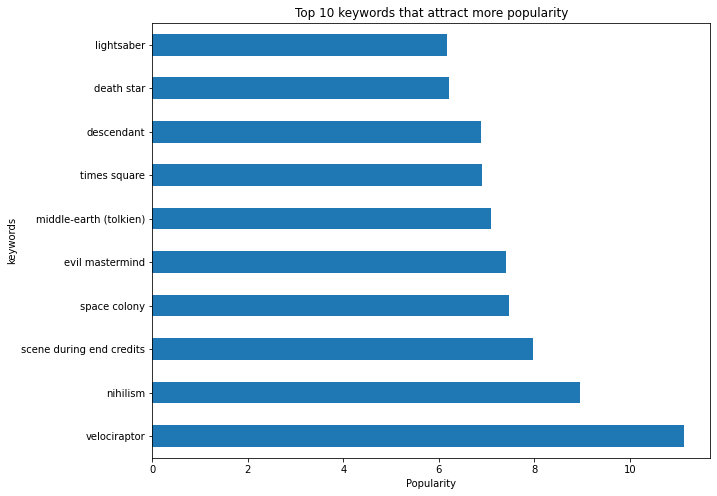

In [114]:
top10_keywords.plot.barh(figsize=(10, 8))
plt.title('Top 10 keywords that attract more popularity')
plt.xlabel('Popularity');

Report:

### Research Question 6

Which Genres has the:
- Highest vote count
- Lowest vote count

In [116]:
genres_vote_count = spilldown(column='genres', include='vote_count')

In [119]:
# Top 10 Genres vote count
top10_gen_votecount = pd.DataFrame(genres_vote_count.head(10))
top10_gen_votecount

,vote_count
genres,
Adventure,543.687861
Science Fiction,470.790677
Fantasy,456.454762
Action,417.505814
Animation,339.369530
Family,302.833790
Crime,289.500769
War,282.484496
Thriller,269.256644


In [129]:
def genre_visual_votecount(val, title):
    """
        Function to display the genres that attract more vote count.
        
    """
    val.plot.barh(figsize=(8, 8))
    plt.xlabel('Vote count mean')
    plt.title(title);


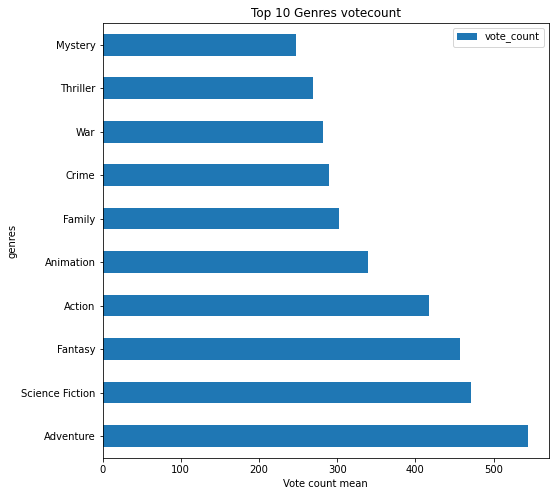

In [130]:
genre_visual_votecount(top10_gen_votecount, 'Top 10 Genres votecount')

In [131]:
least_gen_votecount = genres_vote_count.tail(10)

In [125]:
least_gen_votecount

genres
Western        211.737500
History        198.529412
Drama          197.167698
Comedy         192.646665
Romance        179.086624
Music          145.138643
Horror         127.462647
Documentary     43.968454
TV Movie        38.477273
Foreign         17.266667
Name: vote_count, dtype: float64

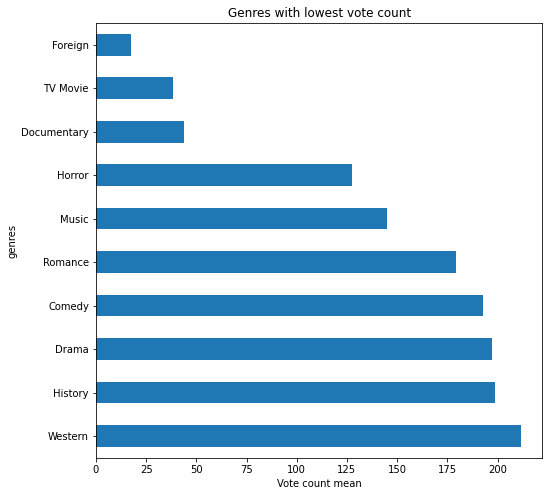

In [132]:
genre_visual_votecount(least_gen_votecount, "Genres with lowest vote count")

Report:

### Research Question 7
- Which year has the most movie released?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!